<h2>INITIAL CONTRIBUTION</h2></br>
<h4>By Edward Okeyo Obala</h4>


<p>Importing all the necessary libraries that I will use through out the notebook, however, Incase of any new development or need for a library that I will use temporarily I will import it into the cell I am using it in</p></br></br><p>Major Libraries and Packages I used</p>
    <li>
    <ul>Pandas-read the set</ul>
    <ul>Numpy-for working with the dataset as an array</ul>
    <ul>Matplot.lib-for the visualisation</ul>
    <ul>Seaborn-for enhanced visualisations</ul>
    </li>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


<p>Reading through the file using pandas and getting the shape</p>


In [214]:
datafile=pd.read_csv("dataset.csv")
# Checking its shape to know the columns and rows
datafile.shape

(1460, 81)

In [215]:
# To present the datafile
datafile

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<h2>Cleaning Process</h2></br>
<p>Cleaning using fillna to fill up empty cells with mean/median/interpolation or select values. I am avoiding deleting cells and columns using dropna() to make sure the data is usable in determining what the most heavily weighted variables are e.g an assumption made is not many homes have swimming pools but a house with a pool is considerably priced higher than that without one so deleting this information might lead to misinformation so I would rather fill it with valid categorical data</p>

In [216]:
# To clean the data I plan on interpolating and using median where I can if its using qualitative data 
# If not I will either fill out the empty cells with select values 

# Replacing Quantitative values in rows with the mean and Interpolation
# e.g Lot Fontage, 

#1. Because NA means no pool in PoolQC, fence in Fence, Misc in MiscFeature I will replace NA with none
# Since there are multiple columns with this I will fill them with a loop

columns_to_fill=["Alley","BsmtQual","BsmtCond",
                 "BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageType",
                 "GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]
clean_datafile=datafile
for i in columns_to_fill:
    clean_datafile[i]=clean_datafile[i].fillna("Not_there")

# This is after the empty spaces for the following cells have been filled with "Not_there"
# I also did this to the specific columns rather than the whole data set to avoid mixing up 
# qualitative and quantitative data
# An alternate way of doing this would be to check for each column in the row if the values are qualitative with 
# an instance checker to check the data type pf the set. This being a simple loop it will not be tedious o{n} 
# I would then check for NA values and fill them with "Not_There"


#2.Looping through Qualitative rows to check if the values are numerical and then replacing NA columns 
# with the average of each column

# Length of column
x=[datafile.shape[1]]

# Looping thorugh the whole width(columns) of the set
# with an isinstance checker I will look for data type that is a integer or float that way I will know which 
# rows have numerical values without going throught the whole array  
for i in range (0,x[0]):
    if isinstance(clean_datafile.iloc[0,i],int)==True or isinstance(clean_datafile.iloc[0,i],float)==True:
        clean_datafile.iloc[:,i]=clean_datafile.iloc[:,i].fillna(clean_datafile.iloc[:,i].mean())
    else:
        continue

#3. Filling the rest of the NA cells with "value_absent" assuming they are not integers or floats
# and that in the first step i had already filles the rest of the values with valid categories
clean_datafile=clean_datafile.fillna("value_absent")

<h2>Exploratory Data Analysis</h2></br>
<p>For this I decided to categorise the data into two groups which was the </p>
<li> 
    <u1>Continous/Numerical data </u1>
    <u1>Categorical data</u1>
    </li>

</br><p>For the contnous data I ended up using a scatter plot and a simple regression line, for the sake of the discrete data, to determine what sort of relationship the features have with the Sale price. For the categorical data I used a box plot in seaborn this is because it can show: 
    <li>
        <u1>The number of features that fall within that category,</u1>
        <u1>The minimum and maximum Sale price point that is represented in that category,</u1>
    </li></p>
    
<p><strong>Note</strong> Some numerical values almost fall in the categories segment as they are repetitive such sa number of rooms and such which move from different ranges and vice cersa so I made some slight changes to things  such as year and MSSubclass which I pushed into categorical data as I consider them ordinal data</p></br>
<p>I also classified the discrete data as continous as classifying them as categorical would throw out a lot of information. Link to a resource I used to inform my decision</p>
</br>link: https://stats.stackexchange.com/questions/261396/integer-data-categorical-or-continuous#:~:text=Integers%20are%20discrete%2C%20not%20continuous,could%20lose%20quite%20a%20bit. 

In [217]:
# displaying the cleaned dataset
clean_datafile

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Not_there,Reg,Lvl,AllPub,...,0,Not_there,Not_there,Not_there,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Not_there,Reg,Lvl,AllPub,...,0,Not_there,Not_there,Not_there,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Not_there,IR1,Lvl,AllPub,...,0,Not_there,Not_there,Not_there,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Not_there,IR1,Lvl,AllPub,...,0,Not_there,Not_there,Not_there,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Not_there,IR1,Lvl,AllPub,...,0,Not_there,Not_there,Not_there,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Not_there,Reg,Lvl,AllPub,...,0,Not_there,Not_there,Not_there,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Not_there,Reg,Lvl,AllPub,...,0,Not_there,MnPrv,Not_there,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Not_there,Reg,Lvl,AllPub,...,0,Not_there,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Not_there,Reg,Lvl,AllPub,...,0,Not_there,Not_there,Not_there,0,4,2010,WD,Normal,142125


***Analysis of Non-Categorical data (Numerically Represented)***

In [218]:
# Checking the columns in the dataset
clean_datafile.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [219]:
# All non-categorical data, I used in the upper cell to determine all the numerical values and from it 
# I formed the list of the columns with numerical data.
# From then I went through the list removing values that were represented numerically but were categorical data
# Such as Years and MSSubclass
# The product is purely non-categorical data
# Some of the data might not seem continous such as the number of rooms but I did not consider them categorical 
# as they are disrete values but do not represent groups and decided to leave them behind
features=['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 
        'TotalBsmtSF','1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars', 
       'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal']

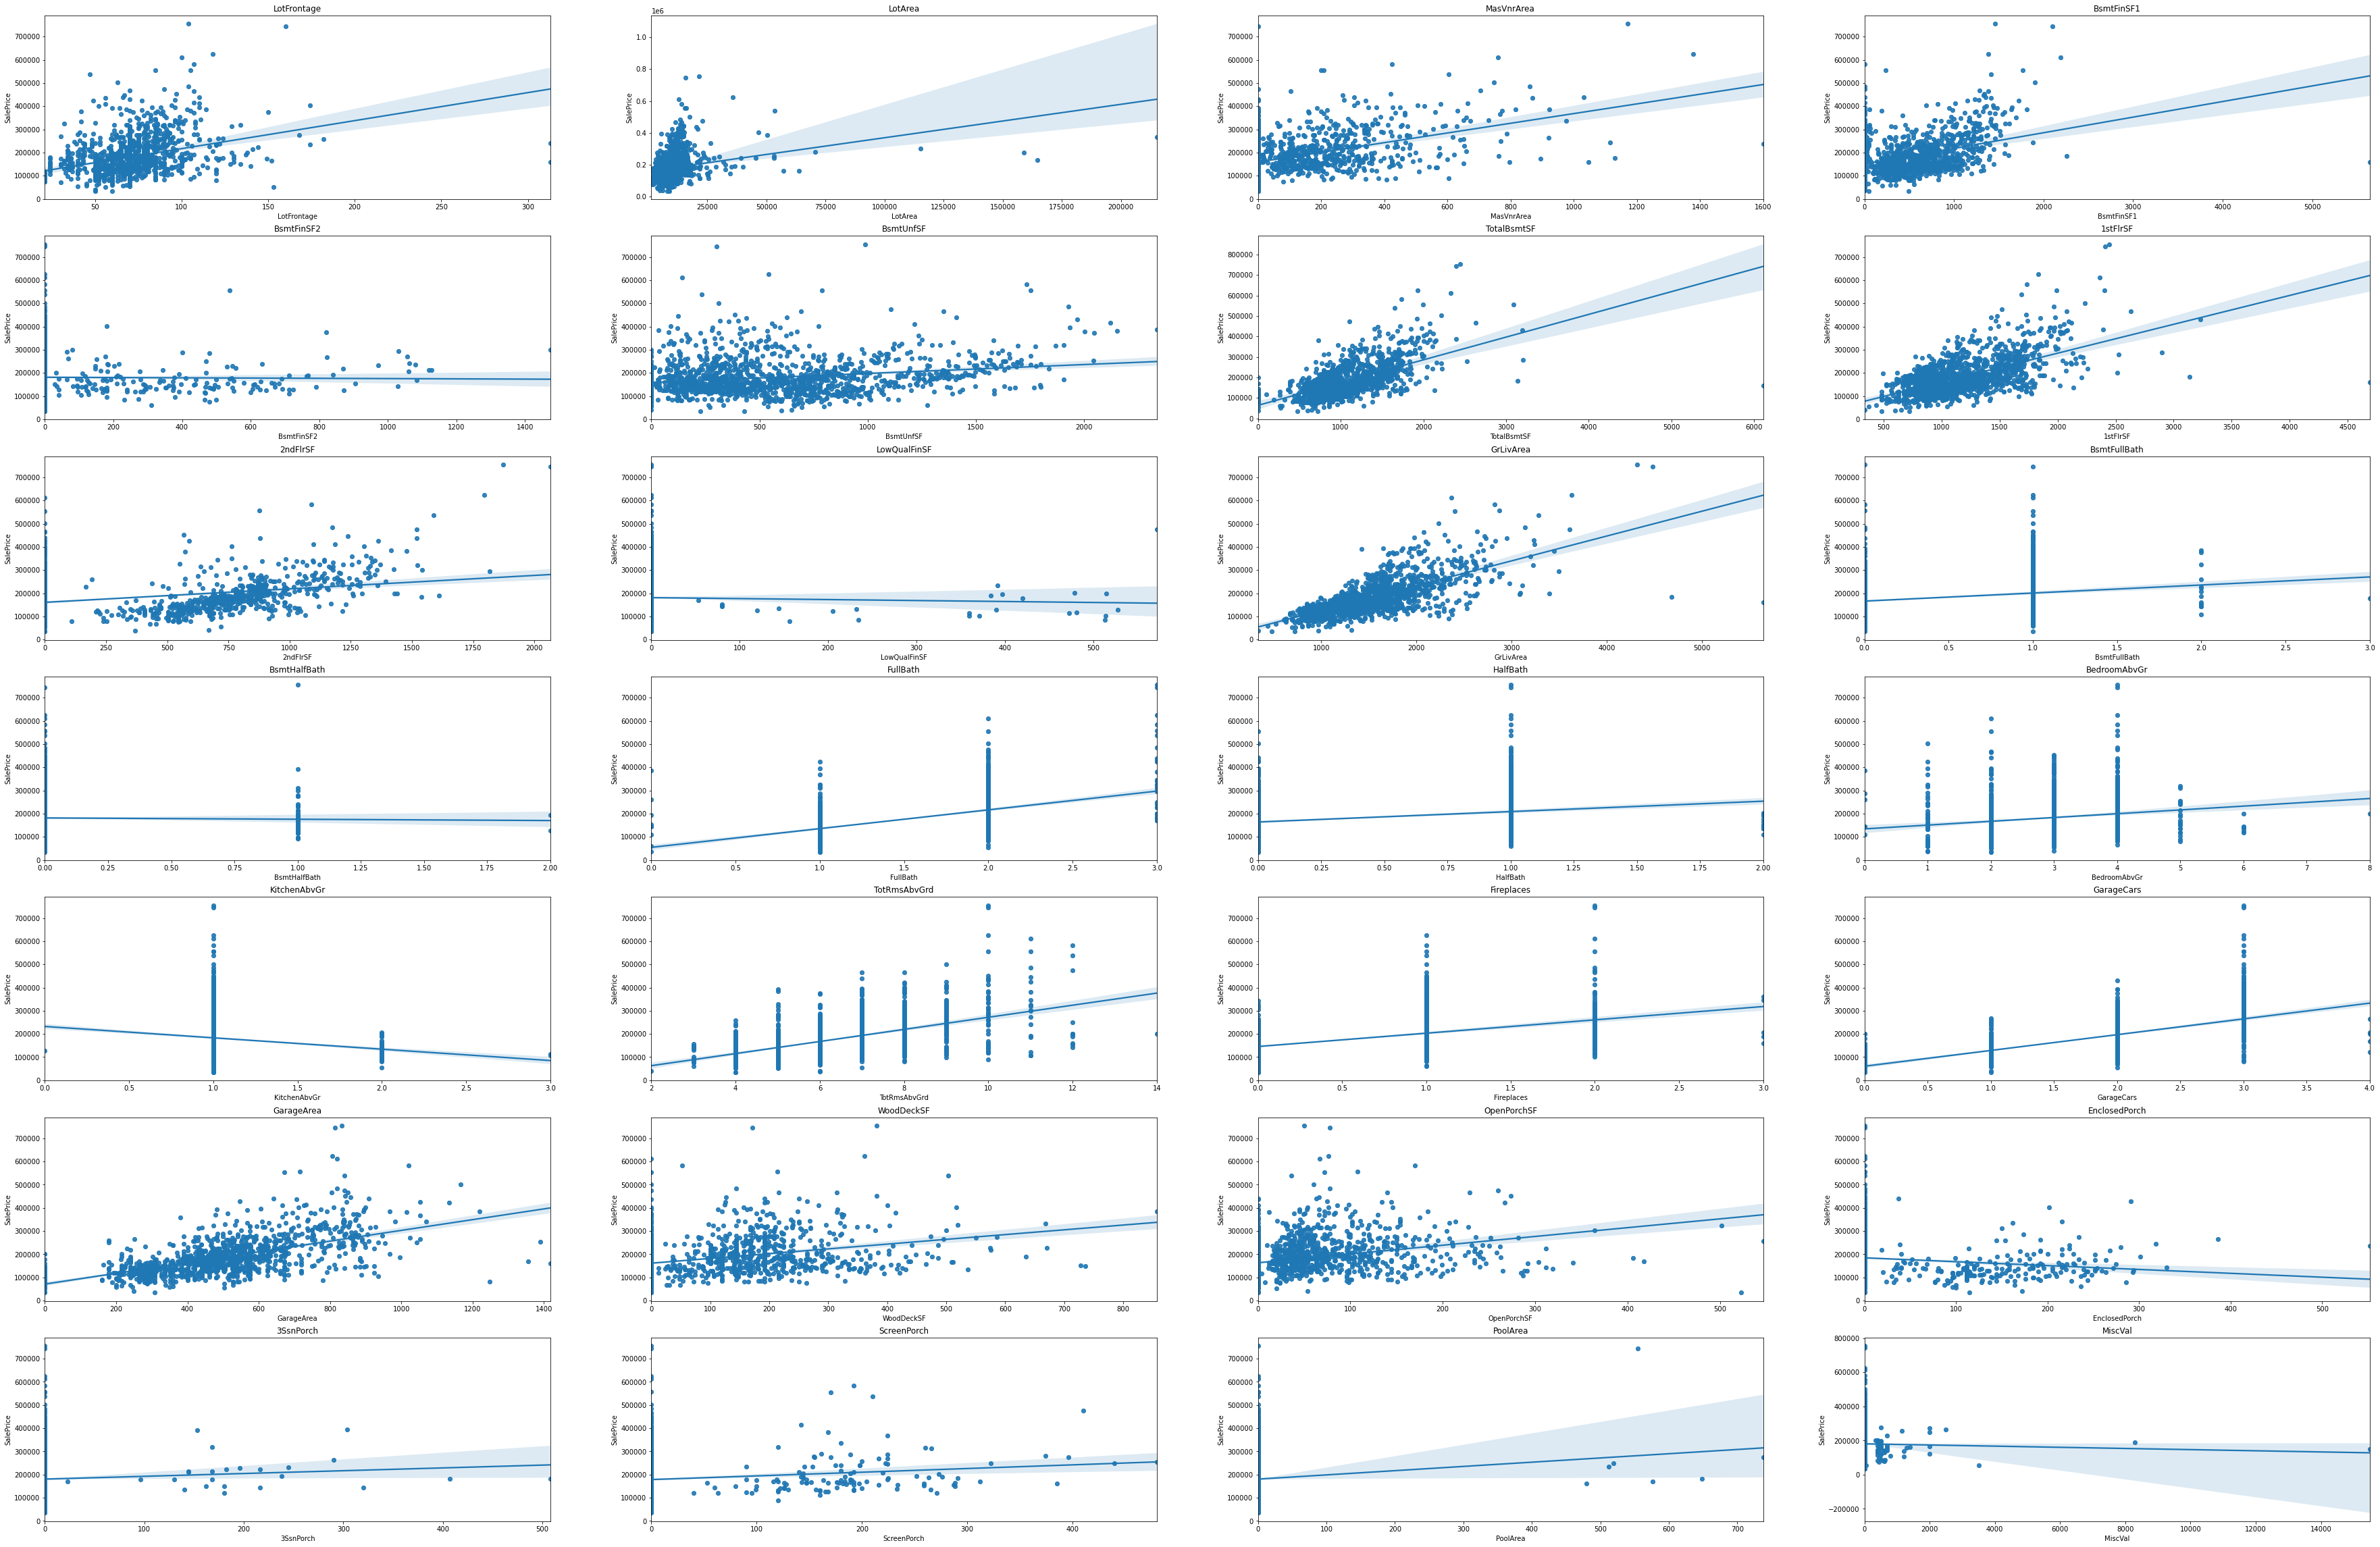

In [220]:
# I created a sub variable to use in to show the expected objects in the subset plot
sub=0
for i in features:
    if sub<32:
        sub+=1
        #Creating a subplot to represent multiple plots 
        plt.subplot(8,4,sub)
        # Plottinf a scatter plot with the various values in each row
        plt.scatter(clean_datafile[i],clean_datafile["SalePrice"] ,alpha=0.5)
        # labels
        plt.xlabel(i)
        plt.ylabel("Price of sale")
        plt.title(i)
        # Adding a line of best fit without using a learning model
        plt.subplots_adjust(left=None, bottom=5, right=2, top=6, wspace=None, hspace=None)
        # Adgusting the spacing of the subplots
        ax = sns.regplot(x=clean_datafile[i], y=clean_datafile["SalePrice"], data=clean_datafile)
        

fig = plt.gcf()
fig.set_size_inches(25.5, 35.5)



        
# Zoom in with double left click 

<h3>Conclusion</h3>

</br><p> The Non-categorical data consisted of 28 different variables considered in property pricing. </p>
    
</br>
<p>There are four types of data represented in the plots above</p><li>
    <ul>Data features with positive relationsships</ul>
    <ul>Data features with negative relationsships</ul>
    <ul>Data features with neutral relationsships</ul>
    <ul>Limited discrete data</ul>
</li>
</br>
<h4>Data with Positive Relationships</h4>
<p>There were 16 data points with positive relationships with the Sale price, this is inclusive of discrete data points.
This were features and data points that their value/size increased with the increase in sale price.such as GrLivArea (Ground LIving Area) which had the strongest positive relationship with the sale price </p>

</br>
<h4>Data with Negative Relationships</h4>
<p>There were 3 data points with negative relationships with the Sale price, This were features and data points that their value/size decreased with the increase in sale price. An example is the Enclosed Porch area which decreased in size despite the increase in the sale price </p>

</br>
<h4>Data with Neutral Relationships</h4>
<p>There were 8 data points with neutral relationships with the Sale price inclusive of discrete datapoints, This were features and data points that their value/size were not affected/slightly affected with the increase in sale price. An example is the Miscallenous features' value which stayed neutral to the increase in the sale price</p>

</br>
</br>

<h3>Analysis of Categorized data</h3>

50


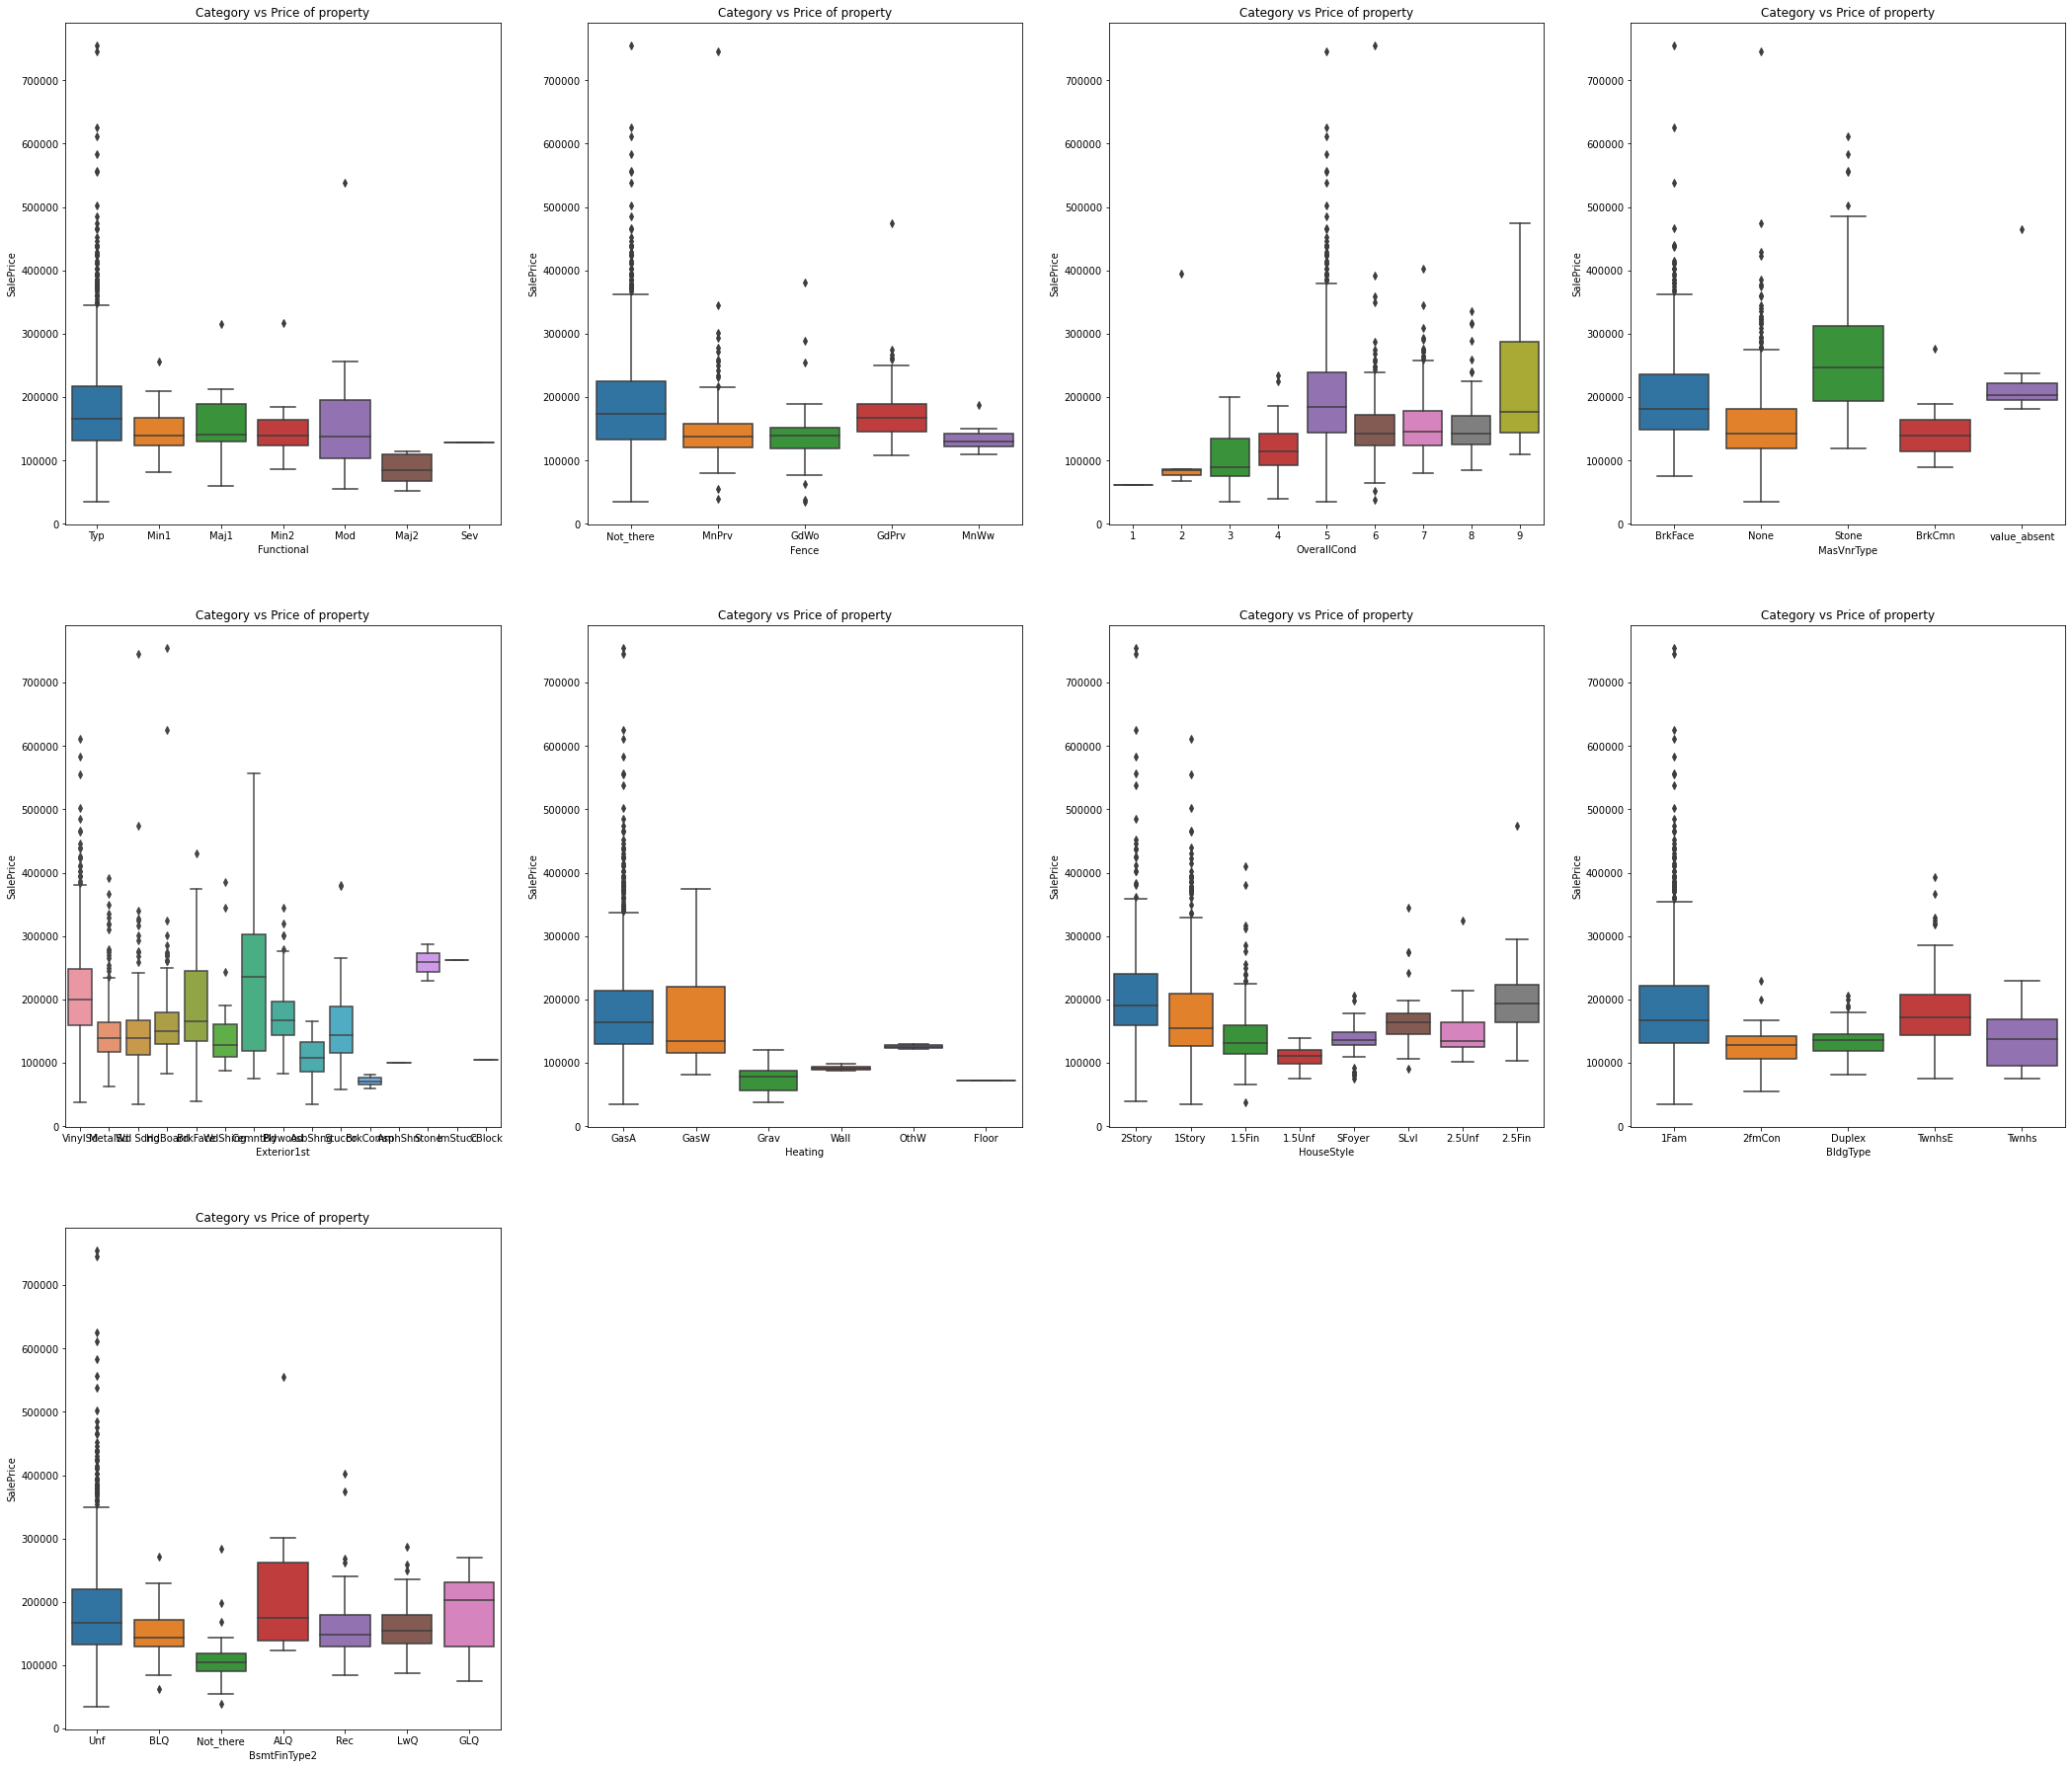

In [236]:
# All the features in the dataset that are going to be sifted through by looping through it with the 
# numerical values and removing them from the categorical set 
cat_features=['MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']

# The loop that is going to go through the list above and remove all numerical coluumns except for the yaars 
# and a few other columns that are classified as categorical
for i in features:
    if str(i) in cat_features:
        cat_features.remove(i)
        
print(len(cat_features))

# Getting random values
# I am using the random value to display 10 random visualizations in the list as i realised my computer's 
# perfrommance reduced significantly when I tried to represent all the values in the box plots 
# So i thought doing so might spare any system someone was using inclusive of any other operations they 
# might want to do
import random
m=1
rand=0
while (m<10):
    n=random.randint(1,49)
    m+=1
    #The subplot specifications
    plt.subplot(3,4,m-1)
#   I used a seaborn boxplot for the folloing reasons
#   To show The number of features that fall within that category, 
#   To show the minimum and maximum Sale price point that is represented in that category,
    sns.boxplot(x=clean_datafile[cat_features[n]], y="SalePrice", data=clean_datafile)
    plt.xlabel(cat_features[n])
    plt.ylabel("SalePrice")
    plt.title("Category vs Price of property")
    plt.subplots_adjust(left=None, bottom=5, right=2, top=8, wspace=None, hspace=None)
    
    
fig = plt.gcf()
fig.set_size_inches(15.0, 8.0)



# Zoom in with double left click

<h3>Conclusion</h3>
<p>The categorical data was represented and from it you can see catagories that were dominant such as the (RRNn) Within 200' of North-South Railroad, of (Condition1) Proximity to various conditions, having a long height across different price points in the box plot others were negligable such as (Nosewa)Electricity and Gas Only, of (utilities)Type of utilities available, and which was narrowly represented in the box plot in terms of height</p>

<h2>Learning the Coeffecients (Weights applied to each value)</h2>

<p> I am looking to use two methods to identify the association strength between the values and the result for one I will use Pearsons correlation for the continous data usable and Continuous Eta squared for the categorical data
</p>

In [237]:
# features added to both the categorical and cotnoinous features
# I added the SalePrice Column to both initial lists so I can deduce the correlation.associiative stregth with it  
new_features=['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 
        'TotalBsmtSF','1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars', 
       'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal','SalePrice']

cat_features1=['MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition','SalePrice']

In [238]:
# Created new datasets using the lists above
# features with contonous values
continous_features=clean_datafile[new_features]

# features withcategoriccal values
categorical_features=clean_datafile[cat_features1]


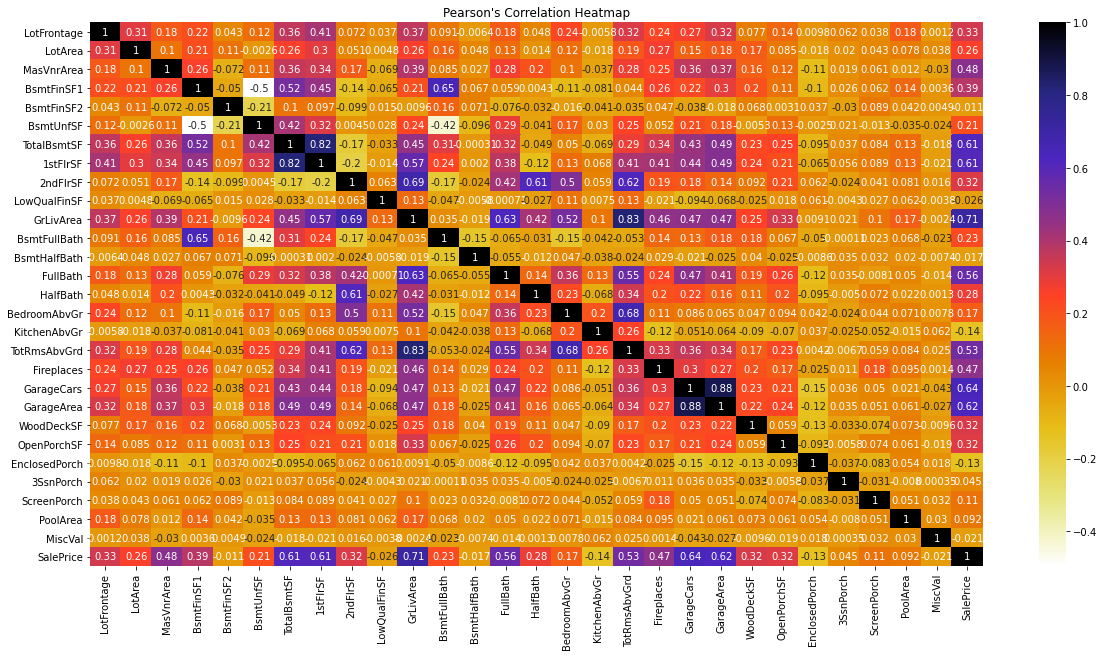

In [239]:
# Performing a correlation for the continous variable then showing it on a seaborn heatmap 
# The heatmap reflects the level of correlation using the Pearson's correlation (default Numpy method) with each factor in the tables,
# From there I will check the highest correlation value in the dataset to find the most prevalent contnous column
plt.figure(figsize=(20,10))
cor=continous_features.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title("Pearson's Correlation Heatmap")
plt.show()


# Zoom in with double left click

<h4>Conclusion of Pearsons Correlation test on all the continous variable</h4></br>
<p>The variable with the highest correlation was the GrLivArea which represents the above grade (ground) living area square feet with a correlation of <strong>+0.71/+1</strong> </p>

Text(0.5, 1.0, 'SalePrice vs Categorical features Eta Squared Associative strength test Bar graph')

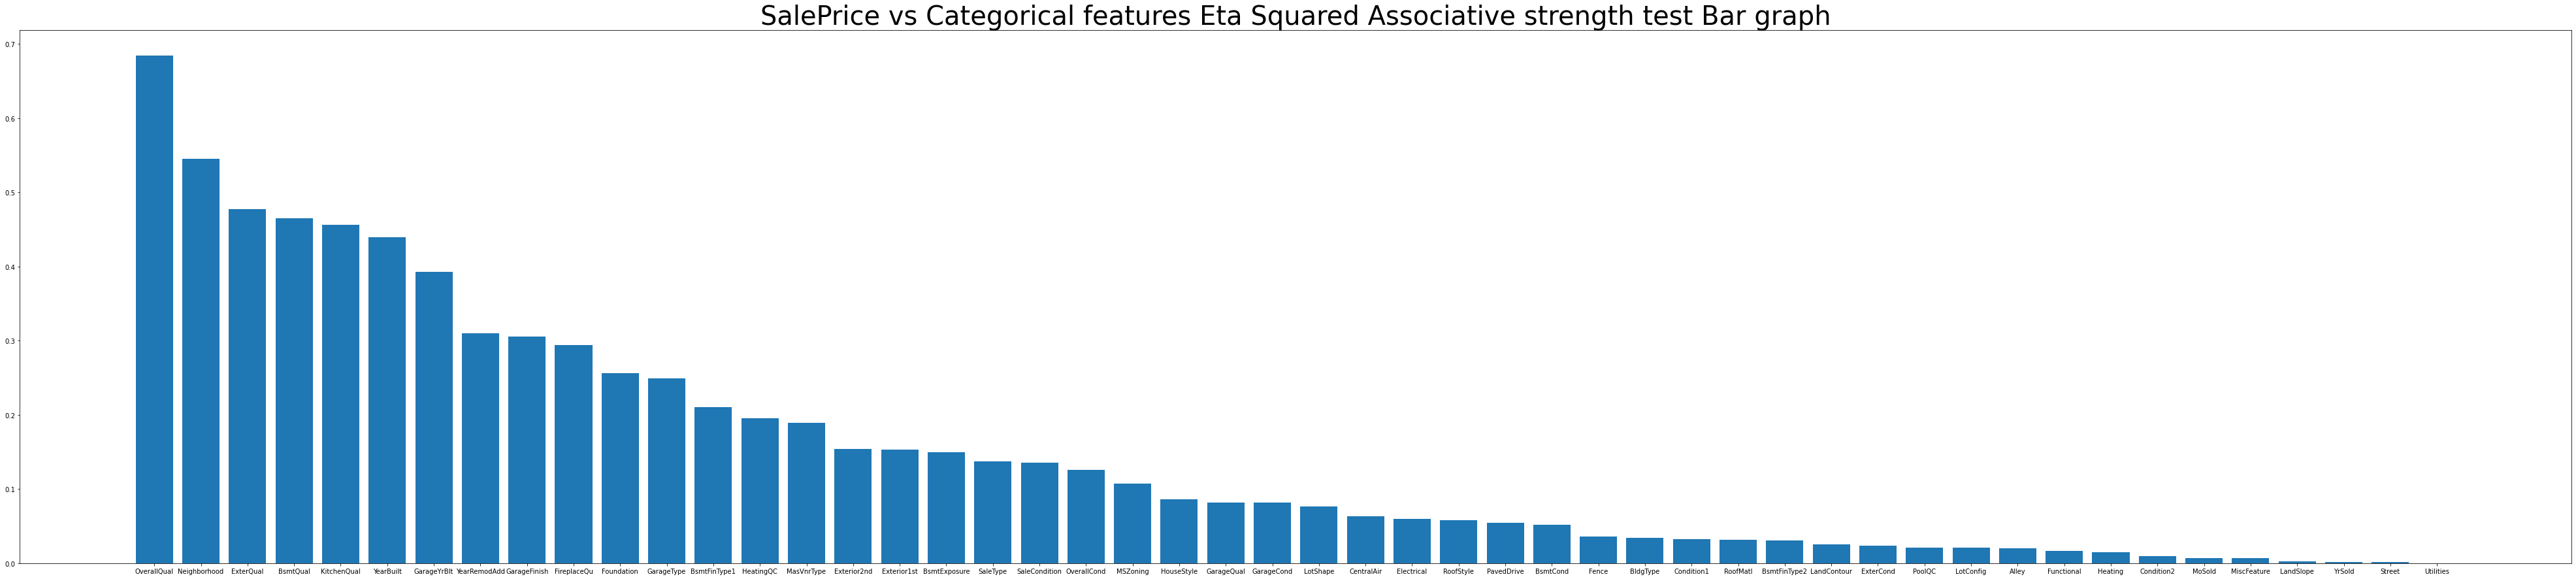

In [243]:
# performing an Eta squared operation on the Categorical data
# I will represent this on the data
# importing pingouin to use Eta squared
# download pingouin using pip install in python
# pip install pingouin/pip3 install pingouin
import pingouin as pg


# to get rid of multi indexing
categorical_features.columns = categorical_features.columns.get_level_values(0)

# disctionary to have all the categorical features in line with its associative strength
correlation_categories={}

# Eta squared operation
for i in cat_features:
    aov=pg.anova(dv="SalePrice", between=i, data=categorical_features, detailed=True)
    correlation_categories[i]=aov.iloc[0,6]

# Sortinng the dictionary in descending order to represent the data that way too
import operator
correlation_categories=dict( sorted(correlation_categories.items(), key=operator.itemgetter(1),reverse=True))


# To plot each value against the sale price
plt.figure(figsize=(70,15))
plt.bar(correlation_categories.keys(), correlation_categories.values())
plt.title("SalePrice vs Categorical features Eta Squared Associative strength test Bar graph", fontsize=40)



# Zoom in with double left click

<h4>Conclusion of Eta Squared test on all the continous variable</h4></br>

<p>I used Eta squared because Eta squared is intended for use with categorical independent variables and continuous DVs.</p>
<strong>NOTE: Eta Squared Performance Range</strong></br>
<li>
    <ul>Large - 1.00>=0.14</ul>
    <ul>Medium - 0.14>0.06</ul>
    <ul>Small - 0.06>0.01</ul>
    <ul>Negligable - 0.01>0.00</ul>
</li>
<p>The variable with the highest correlation was the OverallQual which represents the Rates the overall material and finish of the house with an assocation strength of <strong>+0.68/+1</strong> </p>

<strong>Reference :</strong>(nominal vs scale - Part 3c: Effect size (eta squared), 2021)

<h2>Conclusion</h2>
</br>
<p>From this I have found that the Ground living space in Area (GrLivArea) had the closest correlation amongst the <strong>continous data</strong> and best describes the Sale price column as it rises almost proportionally to the sales price.</p></br><p>Amongst the <strong>categorical data</strong> I found the Overall material and finish of the house(OverrallQual) had the strongest associative strength and also increased almost proportionally to the Sale price</p></br><p>I could not compare the two because of the complete difference in terms of their performance/correlation/association ranges</p>

<h4>I however concluded that the GRLivArea best represents the Sale Field out of alll the columns as its continous nature gave it an edge over the categorical nature of OverallQual in terms of its growth</h4>

<h2>References</h2>
</br></br>
Peterstatistics.com. 2021. nominal vs scale - Part 3c: Effect size (eta squared). [online] Available at: <https://peterstatistics.com/CrashCourse/3-TwoVarUnpair/NomScale/NomScale3c.html> [Accessed 7 April 2021].
</br>
</br>
Shieh, G. Confidence intervals and sample size calculations for the weighted eta-squared effect sizes in one-way heteroscedastic ANOVA. Behav Res 45, 25–37 (2013). https://doi.org/10.3758/s13428-012-0228-7
</br>
2021. [online] Available at: <https://www.researchgate.net/figure/ETA-squared-values-weights-for-the-dimensions-of-the-composite-score_tbl1_308727387> [Accessed 7 April 2021].
</br>

Eta squared and partial eta squared as measures of effect size in educational research. [online] Available at: <https://www.sciencedirect.com/science/article/abs/pii/S1747938X11000029> [Accessed 7 April 2021].
</br>
correlate?, i., Reddy, N. and nayak, A., 2021. is it better to correlate and encode or encode and correlate?. [online] Data Science Stack Exchange. Available at: <https://datascience.stackexchange.com/questions/81618/is-it-better-to-correlate-and-encode-or-encode-and-correlate> [Accessed 7 April 2021].